# Vinho Verde - Wine Dataset Predicting Wine Type 
### My dataframe - Wines
#### Machine Learning - Predicting Wine Type (Red or White)

In [131]:
# Set up my wine dataset - My DataFrame

import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

In [132]:
RW_df = pd.read_csv('winequality-red.csv', delimiter = ';')
WW_df = pd.read_csv('winequality-white.csv', delimiter = ';')

In [133]:
WW_df['type'] = 'White Wine'
RW_df['type'] = 'Red Wine'

In [134]:
df_wines = pd.concat([WW_df, RW_df])

In [135]:
def label(x):
    if (x == 8) or (x == 9) or (x == 7)  :
        return 'High'
    
    elif x in [5, 6]:
        return 'Medium'
    else:
        return 'Low'

In [136]:
df_wines['quality_label'] = df_wines['quality'].apply(lambda x: label(x))

In [137]:
df_wines['type'].value_counts()

White Wine    4898
Red Wine      1599
Name: type, dtype: int64

In [138]:
# *data pre-processing* using sklearn
from sklearn.preprocessing import StandardScaler, LabelEncoder

from sklearn.model_selection import train_test_split

# model selection
from sklearn.ensemble import RandomForestClassifier

# metrics evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score

### Preprocessing 

In [139]:
# Step 1 of Preprocessing

# Normalization of the data 

In [140]:
le = LabelEncoder() 
df_wines['type'] = le.fit_transform(df_wines['type'])

In [141]:
df_wines['type']

0       1
1       1
2       1
3       1
4       1
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: type, Length: 6497, dtype: int64

In [205]:
df_wines['type'].value_counts()

1    4898
0    1599
Name: type, dtype: int64

In [142]:
# Step 2 of Preprocessing

In [143]:
from sklearn.model_selection import train_test_split
from collections import Counter
from sklearn.preprocessing import StandardScaler
from sklearn.preprocessing import LabelEncoder

In [181]:
# Selection Features 

# To start we need first to select the necessary features in train set. 

wtp_features = df_wines.iloc[:,:-3]
wtp_feature_names = wtp_features.columns
wtp_class_labels = np.array(df_wines['type'])

# Splitting into train and test. We need to separate out the prediction class in train and test set. 

# Here the test size is 30%.

wtp_train_X, wtp_test_X, wtp_train_y, wtp_test_y = train_test_split(wtp_features,
wtp_class_labels, test_size=0.3, random_state=42)

print(Counter(wtp_train_y), Counter(wtp_test_y))
print('Features:', list(wtp_feature_names))

Counter({1: 3425, 0: 1122}) Counter({1: 1473, 0: 477})
Features: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [191]:
# Or just use the simply code:

X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [182]:
from imblearn.under_sampling import RandomUnderSampler

In [190]:
rus = RandomUnderSampler()
X_train, y_train = rus.fit_resample(X_train, y_train)

In [183]:
conda install -c glemaitre imbalanced-learn

Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: failed with repodata from current_repodata.json, will retry with next repodata source.
Solving environment: failed with initial frozen solve. Retrying with flexible solve.
Solving environment: \ 
Found conflicts! Looking for incompatible packages.
This can take several minutes.  Press CTRL-C to abort.
                                                                               failed

UnsatisfiableError: The following specifications were found
to be incompatible with the existing python installation in your environment:

Specifications:

  - imbalanced-learn -> python[version='2.7.*|3.4.*|3.5.*|3.6.*']

Your python: python=3.8

If python is on the left-most side of the chain, that's the version you've asked for.
When python appears to the right, that indicates that the thing on the left is somehow
not available for the python version you are constrained to. Note that conda will n

In [145]:
# Defining X

X = df_wines.drop([ 'citric acid', 'residual sugar','free sulfur dioxide', 'total sulfur dioxide', 'density' , 'pH', 'sulphates' , 'quality_label', 'quality'], axis=1)
X.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 1598
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fixed acidity     6497 non-null   float64
 1   volatile acidity  6497 non-null   float64
 2   chlorides         6497 non-null   float64
 3   alcohol           6497 non-null   float64
 4   type              6497 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 304.5 KB


In [163]:
X.shape

(6497, 5)

In [146]:
# Defining y

y = df_wines['type']

In [147]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: type, Length: 6497, dtype: int64

In [164]:
y.shape

(6497,)

In [148]:
 # Define the scaler

    # The idea behind StandardScaler is that it will transform your data 
    
                                 # such that its distribution will have a mean value 0 and standard deviation of 1
    
wtp_ss = StandardScaler().fit(wtp_train_X)

# Scale the train set

wtp_train_SX = wtp_ss.transform(wtp_train_X)

# Scale the test set

wtp_test_SX = wtp_ss.transform(wtp_test_X)

In [149]:
# Or simply:

sc = StandardScaler()

X_train = sc.fit_transform(X_train)    
X_test = sc.transform(X_test)

In [150]:
# ---

### Modelling
#### 1-) Logistic Regression

In [151]:
from sklearn.linear_model import LogisticRegression

In [152]:
### wtp = wine type prediction 

wtp_lr = LogisticRegression()
wtp_lr.fit(wtp_train_SX, wtp_train_y)

LogisticRegression(C=1.0, class_weight=None, dual=False, fit_intercept=True,
intercept_scaling=1, max_iter=100, multi_class='ovr', n_jobs=1,
penalty='l2', random_state=None, solver='liblinear', tol=0.0001,
verbose=0, warm_start=False)

LogisticRegression(multi_class='ovr', n_jobs=1, solver='liblinear')

In [153]:
### The model LR now is ready.

In [154]:
from sklearn.metrics import classification_report

wtp_lr_predictions = wtp_lr.predict(wtp_test_SX)

print(classification_report(wtp_test_y,wtp_lr_predictions, target_names=['Red', 'White']))

              precision    recall  f1-score   support

         Red       0.99      0.98      0.99       477
       White       0.99      1.00      1.00      1473

    accuracy                           0.99      1950
   macro avg       0.99      0.99      0.99      1950
weighted avg       0.99      0.99      0.99      1950



In [193]:
wtp_lr = LogisticRegression()
wtp_lr.fit(wtp_train_X, wtp_train_y)

/Users/brunobernardo/opt/anaconda3/lib/python3.8/site-packages/sklearn/linear_model/_logistic.py:763: ConvergenceWarning: lbfgs failed to converge (status=1):
STOP: TOTAL NO. of ITERATIONS REACHED LIMIT.

Increase the number of iterations (max_iter) or scale the data as shown in:
    https://scikit-learn.org/stable/modules/preprocessing.html
Please also refer to the documentation for alternative solver options:
    https://scikit-learn.org/stable/modules/linear_model.html#logistic-regression
  n_iter_i = _check_optimize_result(


LogisticRegression()

In [194]:
# Ok let's scale the train and the test 

In [195]:
# Scale the train set

wtp_train_X = wtp_ss.transform(wtp_train_X)

# Scale the test set

wtp_test_X = wtp_ss.transform(wtp_test_X)

In [197]:
wtp_lr = LogisticRegression()
wtp_lr.fit(wtp_train_X, wtp_train_y)

LogisticRegression()

In [218]:
from sklearn.metrics import classification_report

wtp_lr_predictions = wtp_lr.predict(wtp_test_SX)

print(classification_report(wtp_test_y,wtp_lr_predictions, target_names=['Red', 'White']))

              precision    recall  f1-score   support

         Red       0.99      0.98      0.99       477
       White       0.99      1.00      1.00      1473

    accuracy                           0.99      1950
   macro avg       0.99      0.99      0.99      1950
weighted avg       0.99      0.99      0.99      1950



In [198]:
# All set !

#### Metrics Evaluation and Confusion Matrix

In [199]:
pred_wtp_lr = wtp_lr.predict(wtp_test_X)

In [200]:
pred_wtp_lr.shape

(1950,)

In [201]:
wtp_test_y.shape

(1950,)

In [202]:

# metrics evaluation
from sklearn.metrics import confusion_matrix, classification_report, accuracy_score


In [203]:
print(accuracy_score(wtp_test_y, pred_wtp_lr))

0.9928205128205129


In [206]:
print(confusion_matrix(wtp_test_y, pred_wtp_lr))

[[ 469    8]
 [   6 1467]]


In [208]:
import seaborn as sn

In [233]:
pd.options.display.float_format = '{:.3f}'.format

In [234]:
import matplotlib.pyplot as plt

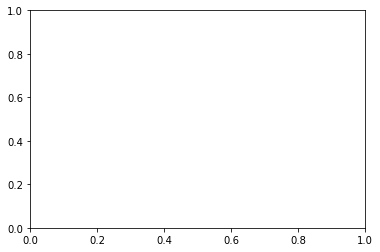

In [237]:
plt.ticklabel_format(useOffset=False)

<AxesSubplot:>

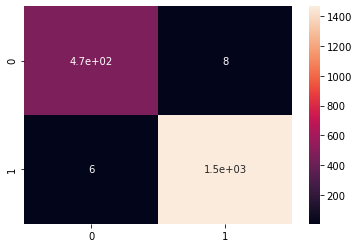

In [239]:
import seaborn as sns
sns.heatmap(confusion_matrix(wtp_test_y, pred_wtp_lr), annot=True)

In [220]:
# Run classifier, using a model that is too regularized (C too low) to see
# the impact on the results
classifier = svm.SVC(kernel='linear', C=0.01).fit(wtp_train_X, wtp_train_y)

In [221]:
np.set_printoptions(precision=2)

In [224]:
from sklearn.metrics import plot_confusion_matrix

In [227]:
wtp_features = df_wines.iloc[:,:-3]
wtp_feature_names = wtp_features.columns
wtp_class_labels = np.array(df_wines['type'])

In [231]:
from sklearn.metrics import cohen_kappa_score
cohen_kappa_score(wtp_test_y, pred_wtp_lr)

0.9805451630144308

In [ ]:
# ---

#### 2-) Decision Tree

In [155]:
from sklearn.metrics import classification_report

from sklearn.tree import DecisionTreeClassifier

In [156]:
wtp_features = df_wines.iloc[:,:-3]
wtp_class_labels = np.array(df_wines['type'])
wtp_label_names = ['Red', 'White']
wtp_feature_names = list(wtp_features.columns)
wtp_train_X, wqp_test_X, wtp_train_y, wtp_test_y = train_test_split(wtp_features,
wtp_class_labels, test_size=0.3, random_state=42)

print(Counter(wtp_train_y), Counter(wtp_test_y))
print('Features:', wtp_feature_names)

Counter({1: 3425, 0: 1122}) Counter({1: 1473, 0: 477})
Features: ['fixed acidity', 'volatile acidity', 'citric acid', 'residual sugar', 'chlorides', 'free sulfur dioxide', 'total sulfur dioxide', 'density', 'pH', 'sulphates', 'alcohol']


In [157]:
# train the model

from sklearn.tree import DecisionTreeClassifier
from sklearn.metrics import classification_report

In [158]:
wtp_dt = DecisionTreeClassifier()
wtp_dt.fit(wtp_train_SX, wtp_train_y)

# predict and evaluate performance

wtp_dt_predictions = wtp_dt.predict(wtp_test_SX)

print(classification_report(wtp_test_y,wtp_dt_predictions, target_names=wtp_label_names))

              precision    recall  f1-score   support

         Red       0.97      0.96      0.97       477
       White       0.99      0.99      0.99      1473

    accuracy                           0.98      1950
   macro avg       0.98      0.98      0.98      1950
weighted avg       0.98      0.98      0.98      1950



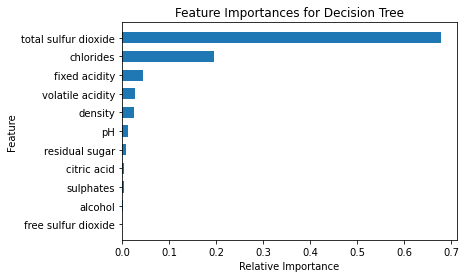

In [159]:
#  feature importance scores based on the patterns learned by the model.

wtp_dt_feature_importances = wtp_dt.feature_importances_
wtp_dt_feature_names, wtp_dt_feature_scores = zip(*sorted(zip(wtp_feature_names,
wtp_dt_feature_importances), key=lambda x: x[1]))
y_position = list(range(len(wtp_dt_feature_names)))
plt.barh(y_position, wtp_dt_feature_scores, height=0.6, align='center')
plt.yticks(y_position , wtp_dt_feature_names)
plt.xlabel('Relative Importance')
plt.ylabel('Feature')
t = plt.title('Feature Importances for Decision Tree')

In [ ]:
# ---

#### 3-) Random Forest

In [160]:
from sklearn.ensemble import RandomForestClassifier

In [161]:
model2 = RandomForestClassifier(random_state=1)

In [162]:
X2 = df_wines.drop([ 'citric acid', 'residual sugar','free sulfur dioxide', 'total sulfur dioxide', 'density' , 'pH', 'sulphates' , 'quality_label', 'quality'], axis=1)

X2.info()

<class 'pandas.core.frame.DataFrame'>
Int64Index: 6497 entries, 0 to 1598
Data columns (total 5 columns):
 #   Column            Non-Null Count  Dtype  
---  ------            --------------  -----  
 0   fixed acidity     6497 non-null   float64
 1   volatile acidity  6497 non-null   float64
 2   chlorides         6497 non-null   float64
 3   alcohol           6497 non-null   float64
 4   type              6497 non-null   int64  
dtypes: float64(4), int64(1)
memory usage: 304.5 KB


In [109]:
y2 = df_wines['type']

In [110]:
y

0       1
1       1
2       1
3       1
4       1
       ..
1594    0
1595    0
1596    0
1597    0
1598    0
Name: type, Length: 6497, dtype: int64

In [111]:
# Normalize feature variables

from sklearn.preprocessing import StandardScaler
X_features = X
X = StandardScaler().fit_transform(X)

In [112]:
# Splitting the data

from sklearn.model_selection import train_test_split

In [113]:
X_train, X_test, y_train, y_test = train_test_split(X, y, test_size=0.3, random_state=42)

In [114]:
# Predicting the Model for Random Forest 

In [115]:
model2.fit(X_train, y_train)

y_pred2 = model2.predict(X_test)

print(classification_report(y_test, y_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       477
           1       1.00      1.00      1.00      1473

    accuracy                           1.00      1950
   macro avg       1.00      1.00      1.00      1950
weighted avg       1.00      1.00      1.00      1950



In [116]:
# ---

#### SVM

In [166]:
import numpy as np
import matplotlib.pyplot as plt
from sklearn import svm, datasets

In [167]:
>>> from sklearn import svm

In [174]:
# Defining X and y

X_svm = df_wines.drop([ 'citric acid', 'residual sugar','free sulfur dioxide', 'total sulfur dioxide', 'density' , 'pH', 'sulphates' , 'quality_label', 'quality'], axis=1)
y_svm = df_wines['type']

In [175]:
# Splitting the data

from sklearn.model_selection import train_test_split

In [176]:
X_svm_train, X_sv_test, y_svm_train, y_svm_test = train_test_split(X_svm, y_svm, test_size=0.3, random_state=42)

In [177]:
# Normalize feature variables

from sklearn.preprocessing import StandardScaler
X_features = X_svm
X_svm = StandardScaler().fit_transform(X_svm)

In [178]:
>>> from sklearn import svm
>>> X = X_svm
>>> y = y_svm
>>> model_svm = svm.SVC()
>>> clf.fit(X, y)


SVC()

In [179]:
model_svm.fit(X_train, y_train)

y_svm_pred2 = model_svm.predict(X_test)

print(classification_report(y_svm_test, y_svm_pred2))

              precision    recall  f1-score   support

           0       1.00      1.00      1.00       477
           1       1.00      1.00      1.00      1473

    accuracy                           1.00      1950
   macro avg       1.00      1.00      1.00      1950
weighted avg       1.00      1.00      1.00      1950



In [180]:
# ---

##### Cohen's Kappa

In [ ]:
# from sklearn.metrics import cohen_kappa_score
# cohen_kappa_score(y_true, y_pred)